In [ ]:
import bittensor as bt 
import matplotlib .pyplot as plt

sub = bt.Subtensor("wss://archive.cruciblelabs.com:9944")

In [ ]:
dereg_block = 7312250 - 10

In [100]:
blocks = list(range(dereg_block - 10, dereg_block + 10, 1))
tao_ins = []
alpha_outs = []
for block in blocks:
    subnet_info = sub.subnet(netuid = 114, block = block)
    tao_ins.append(subnet_info.tao_in)
    alpha_outs.append(subnet_info.alpha_out.tao)

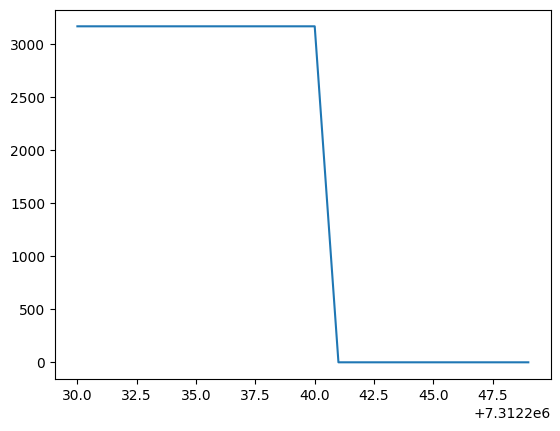

In [101]:
plt.plot(blocks, tao_ins)

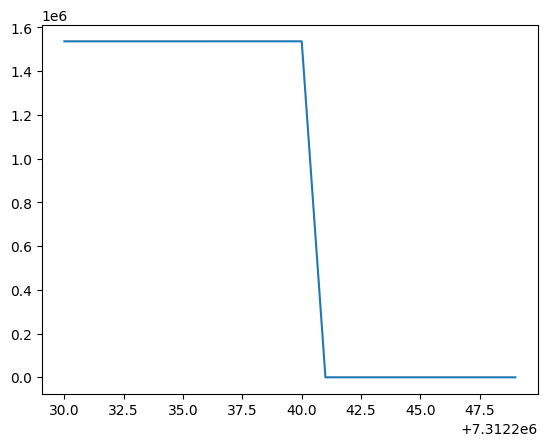

In [103]:
plt.plot(blocks, alpha_outs)

In [104]:
for block, alpha_out, tao_in in zip(blocks, alpha_outs, tao_ins):
    if tao_in.tao < 100:
        print(f"Block: {block}, Alpha Out: {alpha_out}, tao In: {tao_in}")
        break

Block: 7312241, Alpha Out: 0.0, tao In: τ1.000000000


In [116]:
dereg_block = 7312241 - 1
dereg_block

7312240

In [ ]:
meta = sub.metagraph(netuid = 114, block = dereg_block)
subnet_info = sub.subnet(netuid = 114, block = dereg_block)

uid = meta.hotkeys.index(subnet_info.owner_hotkey)
owner_stake = meta.stake[uid]
owner_per_stake = owner_stake / subnet_info.alpha_out.tao
owner_tao_refund = owner_per_stake * subnet_info.tao_in


dered_block: 7312240
alpha_out: ‎1,536,428.210336630Є‎
Owner Stake: 449957.25
Owner % Stake: 0.2928592562675476
Owner Tao Refund: τ926.441865199


In [111]:
balances = {}
for block in range(dereg_block - 10, dereg_block + 10, 1):
    balance = sub.get_balance(subnet_info.owner_coldkey, block = block)
    balances[block] = balance

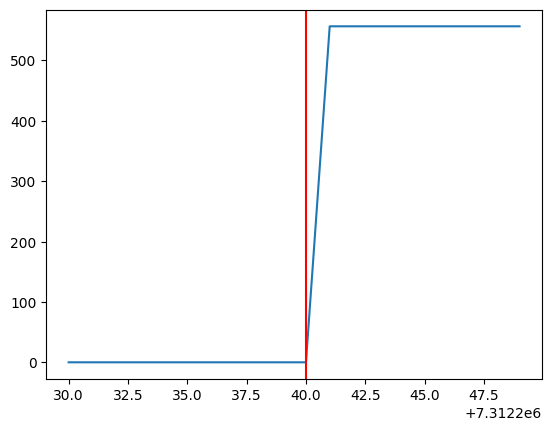

In [112]:
plt.plot(balances.keys(), balances.values())
plt.axvline(dereg_block, color='r')

In [123]:
actual_refund = max(balances.values())
print(
    f"dered_block: {dereg_block}"
    f"\nalpha_out: {subnet_info.alpha_out}"
    f"\nOwner Stake: {owner_stake}"
    f"\nOwner % Stake: {owner_per_stake}"
    f"\nCalculated Owner Tao Refund: {owner_tao_refund}"
    f"\nActual Owner Tao Refund: {actual_refund}"
)

dered_block: 7312240
alpha_out: ‎1,536,428.210336630Є‎
Owner Stake: 449957.25
Owner % Stake: 0.2928592562675476
Calculated Owner Tao Refund: τ926.441865199
Actual Owner Tao Refund: τ556.294493154
